In [1]:
# IMPORTING THE NECCESSARY LIBRARIES
# IMPORT NUMPY FOR ARITHIMETIC, LOGICAL AND SCIENTIFIC COMPUTATIONS
import numpy as np
#IMPORTING PANDAS FOR DATA CLEANING AND WRANGLING
import pandas as pd
#IMPORT SEABORN, MATPLOTLIB AND PLOTLY FOR VISUAL ANALYSIS
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#IMPORT NLTK AND REGULAR EXPRESSION FOR TEXT CLEARING AND WORD CLOUD FOR TEXT VISUALIZATION
import nltk
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
#IMPORTING COUNTVECTORIZER AND TFIDFTRANSFORMER FOR TEXT PROCESSING
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.pipeline import Pipeline
#IMPORTATION SOME ALGORITHMS FOR MACHINE LEARNING
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes  import BernoulliNB
from sklearn.neural_network import MLPClassifier
#IMPORTATION OF METRICS PARAMETER
from sklearn.metrics import confusion_matrix,classification_report, roc_curve,auc
#IMPORTATION OF DEEP LEARNING LIBRARY
import tensorflow as tf

In [2]:
#READING IN THE DATA FOR THE ANALYSIS
df = pd.read_csv('Train data.csv')
df.head()

,author,published,title,text,language,site_url,main_img_url,type,title_without_stopwords,text_without_stopwords,hasImage,label
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0,Real
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0,Real
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0,Real
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0,Real
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0,Real


In [3]:
#DATA DESCRIPTION AND UNDERSTANDING

In [4]:
#CHECKING THE SHAPE OF THE DATA
df.shape

(1600, 12)

In [5]:
# FROM THE ABOVE CODE AND OUTPUT WE HAVE TOTAL OF 1600 ROWS AND 12 COLUMNS

In [6]:
#CHECKING FOR MISSING VALUES
df.isnull().sum()

author                     1
published                  0
title                      0
text                       0
language                   1
site_url                   1
main_img_url               1
type                       1
title_without_stopwords    3
text_without_stopwords     2
hasImage                   2
label                      1
dtype: int64

In [7]:
#FROM THE ABOVE OUTCOME THERE IS A PRESENT OF MISSING VALUES IN SOME COLUMNS, SINCE THE PERCENTAGE OF THE MISSING VAALUE IS NOT MUCH THE MACHINELEARNER DECIDES TO DROP THEM

In [8]:
#DROPPING OF MISSING VALUES
df.dropna(inplace=True)

In [9]:
#DATA AGGREGATION AND VISULIZATION
df2 = df['author'].value_counts()
df2 = df2.head(21)
df2.drop('No Author',inplace =True)
df2

Activist Post                          82
EdJenner                               73
noreply@blogger.com (Der Postillon)    72
Anonymous                              58
Daniel Greenfield                      55
Jason Easley                           45
Alex Ansary                            44
Dr. Patrick Slattery                   37
Henry Wolff                            33
Corbett                                27
tokyowashi (noreply@blogger.com)       20
Sarah Jones                            16
Steve Watson                           16
Hrafnkell Haraldsson                   15
Fed Up                                 12
ActivistPost                           12
ahtribune.com                          11
Sean Colarossi                         11
Admin                                  11
J. D. Heyes                             9
Name: author, dtype: int64

In [10]:
fig = px.bar(x=df2.index, y = df2.values,color= df2.index,title='TOP 20 AUTHORS',
             labels={'x':'AUTHOR NAME','y':'VALUE COUNT'},text =df2.values)
fig.update_layout(height = 600)
fig.show()

In [11]:
df2 = df['type'].value_counts()
df2

bs            523
conspiracy    330
bias          234
satire        146
hate          143
state         104
junksci       102
fake           15
Name: type, dtype: int64

In [12]:
fig = px.bar(x=df2.index, y = df2.values,color= df2.index,title='FREQUENCY COUNT OF NEWS TYPE',
             labels={'x':'TYPE NAME','y':'VALUE COUNT'},text =df2.values)
fig.update_layout(height = 600)
fig.show()

In [13]:
# VISUALIZING TEXT BASED ON THE OUTCOME USING WORDCLOUD
df['label'].value_counts()

Fake    1116
Real     481
Name: label, dtype: int64

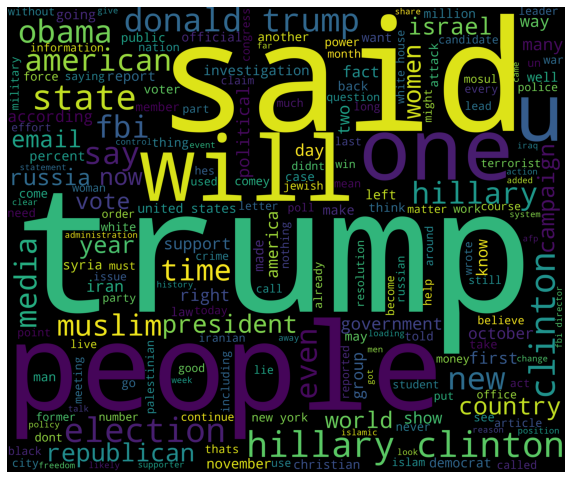

In [14]:
new_data=df[df['label']=='Real']
words = ' '.join(new_data['text'])
cleaned_word=' '.join([word for word in words.split()
                         if 'http' not in word
                         and not word.startswith('@')
                          and word !='RT'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

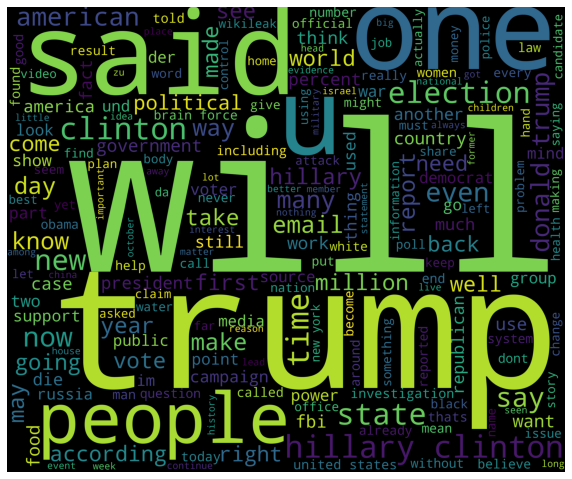

In [15]:
new_data=df[df['label']=='Fake']
words = ' '.join(new_data['text'])
cleaned_word=' '.join([word for word in words.split()
                         if 'http' not in word
                         and not word.startswith('@')
                          and word !='RT'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [16]:
#AFTER THE OVERALL OPERATION I DETECT THAT DATA WAS NOT BALANCED SO I HAVE TO SORT WITH CODE BELOW BY RESAMPLING IT AND RETRY THE OPERATION FOR A BETTER ACCURACY
from sklearn.utils import resample
#Creatation of two different dataframe [real and fake]
df_real = df[(df['label']=='Real')]
df_fake = df[(df['label']=='Fake')]
#UNSAMPLING OF THE REAL CLASS SINCE THAT WHERE THE IMBALANCE OCCURS
df_real_unsampled = resample(df_real,
                             replace =True,n_samples=1116)
# COMBINATION OF THE TWO CLASS
df =pd.concat([df_real_unsampled,df_fake])
df['label'].value_counts()


Real    1116
Fake    1116
Name: label, dtype: int64

In [17]:
# TEXT CLEANING AND PROCESSING
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
nltk.download('stopwords')
stop_words = stopwords.words('english')
def preprocess(x,stem=False):
    x=re.sub(text_cleaning_re,'  ',str(x).lower()).strip()
    tokens=[]
    for token in x.split('\n'):
        if token not in stop_words:
            if stem:
                tokens.append(SnowballStemmer.stem(token))
            else:
                tokens.append(token)
        return '  '.join(tokens)
df.text=df.text.apply(lambda x:preprocess(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Simeon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
#SPLITING OF DATA INTO DEPENDENT AND INDEPENDENT VARIABLES
x = df.text
y = df.label
y =y.map({'Real':1,'Fake':0}).astype(int)
# RANDOM SAMPLING FOR BUILDING OF MODELS
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.3,random_state=1)


#FINAL TEXT PROCESSING AND BUILDING OF MODELS
tcl1 = Pipeline([('vector',CountVectorizer()),('transformer',TfidfTransformer()),('clf', SVC(kernel = 'linear', random_state = 0))])
tcl2 = Pipeline([('vector',CountVectorizer()),('transformer',TfidfTransformer()),('clf', RandomForestClassifier())])
tcl3 = Pipeline([('vector',CountVectorizer()),('transformer',TfidfTransformer()),('clf', ExtraTreesClassifier())])
tcl4 = Pipeline([('vector',CountVectorizer()),('transformer',TfidfTransformer()),('clf', GradientBoostingClassifier())])
tcl5 = Pipeline([('vector',CountVectorizer()),('transformer',TfidfTransformer()),('clf', MLPClassifier(solver = 'sgd', alpha = 1e-5,hidden_layer_sizes =(10,10),random_state = 1))])
tcl6 = Pipeline([('vector',CountVectorizer()),('transformer',TfidfTransformer()),('clf', BernoulliNB())])

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       340
           1       0.91      0.90      0.90       330

    accuracy                           0.90       670
   macro avg       0.90      0.90      0.90       670
weighted avg       0.90      0.90      0.90       670

AxesSubplot(0.125,0.125;0.62x0.755)


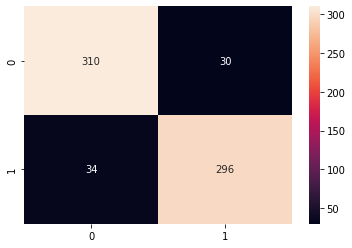

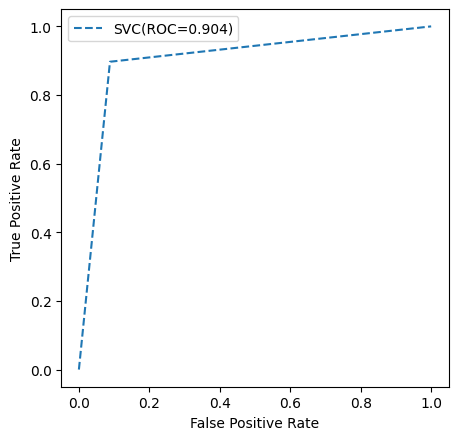

In [19]:
tcl1.fit(x_train,y_train)
pred1 = tcl1.predict(x_test)
print(classification_report(y_test,pred1))
print(sns.heatmap(confusion_matrix(y_test,pred1),annot =True,fmt='.7g'))
tcl1_fpr,tcl1tpr,threshold = roc_curve(y_test,pred1)
auc_tcl1 = auc(tcl1_fpr,tcl1tpr)
plt.figure(figsize=(5,5), dpi =100)
plt.plot(tcl1_fpr,tcl1tpr,ls ='--',label ='SVC(ROC=%0.3f)'%auc_tcl1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       340
           1       0.95      0.85      0.89       330

    accuracy                           0.90       670
   macro avg       0.91      0.90      0.90       670
weighted avg       0.91      0.90      0.90       670

AxesSubplot(0.125,0.125;0.62x0.755)


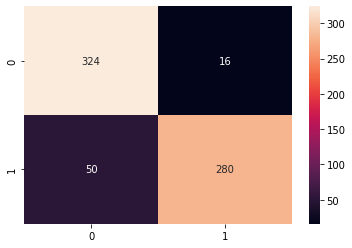

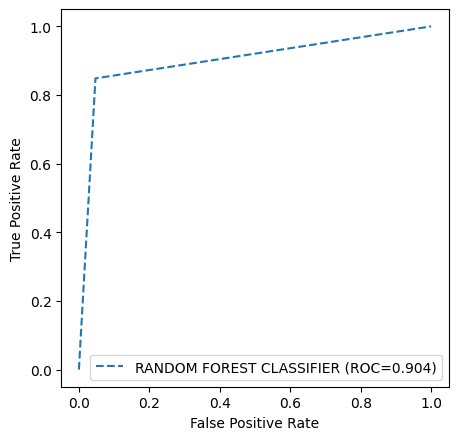

In [20]:
tcl2.fit(x_train,y_train)
pred2 = tcl2.predict(x_test)
print(classification_report(y_test,pred2))
print(sns.heatmap(confusion_matrix(y_test,pred2),annot =True,fmt='.7g'))
tcl2_fpr,tcl2tpr,threshold = roc_curve(y_test,pred2)
auc_tcl2 = auc(tcl2_fpr,tcl2tpr)
plt.figure(figsize=(5,5), dpi =100)
plt.plot(tcl2_fpr,tcl2tpr,ls ='--',label ='RANDOM FOREST CLASSIFIER (ROC=%0.3f)'%auc_tcl1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       340
           1       0.97      0.87      0.92       330

    accuracy                           0.93       670
   macro avg       0.93      0.92      0.93       670
weighted avg       0.93      0.93      0.93       670

AxesSubplot(0.125,0.125;0.62x0.755)


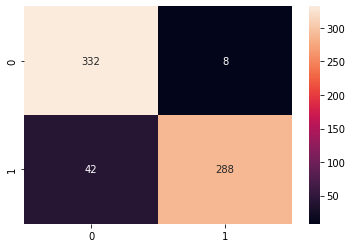

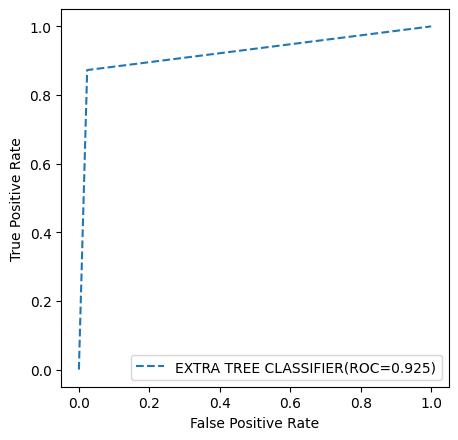

In [21]:
tcl3.fit(x_train,y_train)
pred1 = tcl3.predict(x_test)
print(classification_report(y_test,pred1))
print(sns.heatmap(confusion_matrix(y_test,pred1),annot =True,fmt='.7g'))
tcl1_fpr,tcl1tpr,threshold = roc_curve(y_test,pred1)
auc_tcl1 = auc(tcl1_fpr,tcl1tpr)
plt.figure(figsize=(5,5), dpi =100)
plt.plot(tcl1_fpr,tcl1tpr,ls ='--',label ='EXTRA TREE CLASSIFIER(ROC=%0.3f)'%auc_tcl1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       340
           1       0.91      0.84      0.87       330

    accuracy                           0.88       670
   macro avg       0.88      0.88      0.88       670
weighted avg       0.88      0.88      0.88       670

AxesSubplot(0.125,0.125;0.62x0.755)


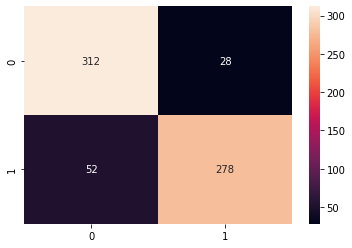

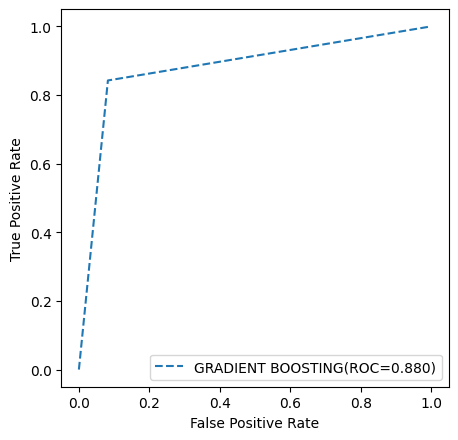

In [22]:
tcl4.fit(x_train,y_train)
pred1 = tcl4.predict(x_test)
print(classification_report(y_test,pred1))
print(sns.heatmap(confusion_matrix(y_test,pred1),annot =True,fmt='.7g'))
tcl1_fpr,tcl1tpr,threshold = roc_curve(y_test,pred1)
auc_tcl1 = auc(tcl1_fpr,tcl1tpr)
plt.figure(figsize=(5,5), dpi =100)
plt.plot(tcl1_fpr,tcl1tpr,ls ='--',label ='GRADIENT BOOSTING(ROC=%0.3f)'%auc_tcl1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

c:\Users\Simeon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Simeon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Simeon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.00      0.00      0.00       340
           1       0.49      1.00      0.66       330

    accuracy                           0.49       670
   macro avg       0.25      0.50      0.33       670
weighted avg       0.24      0.49      0.33       670

AxesSubplot(0.125,0.125;0.62x0.755)


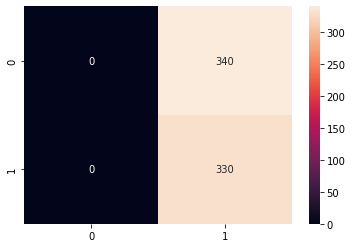

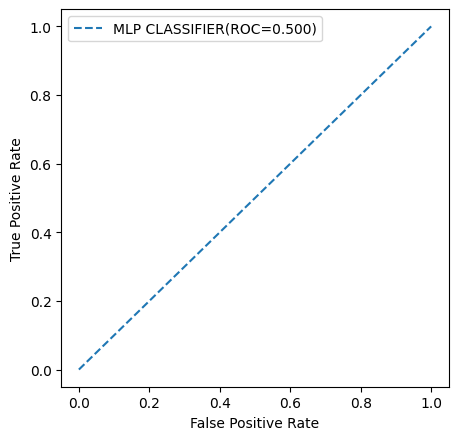

In [23]:
tcl5.fit(x_train,y_train)
pred1 = tcl5.predict(x_test)
print(classification_report(y_test,pred1))
print(sns.heatmap(confusion_matrix(y_test,pred1),annot =True,fmt='.7g'))
tcl1_fpr,tcl1tpr,threshold = roc_curve(y_test,pred1)
auc_tcl1 = auc(tcl1_fpr,tcl1tpr)
plt.figure(figsize=(5,5), dpi =100)
plt.plot(tcl1_fpr,tcl1tpr,ls ='--',label ='MLP CLASSIFIER(ROC=%0.3f)'%auc_tcl1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.95      0.70      0.80       340
           1       0.76      0.96      0.85       330

    accuracy                           0.83       670
   macro avg       0.85      0.83      0.83       670
weighted avg       0.86      0.83      0.83       670

AxesSubplot(0.125,0.125;0.62x0.755)


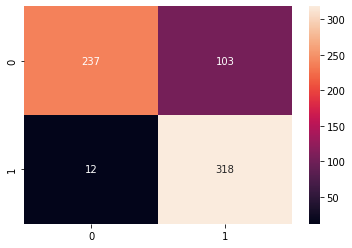

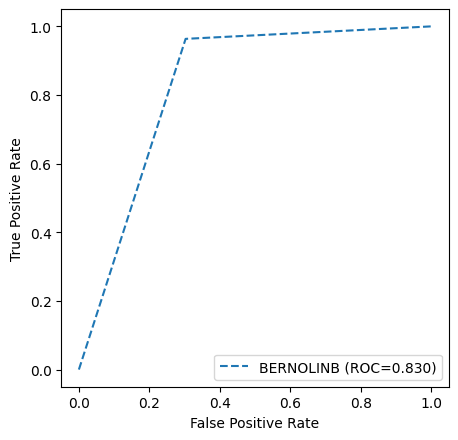

In [24]:
tcl6.fit(x_train,y_train)
pred1 = tcl6.predict(x_test)
print(classification_report(y_test,pred1))
print(sns.heatmap(confusion_matrix(y_test,pred1),annot =True,fmt='.7g'))
tcl1_fpr,tcl1tpr,threshold = roc_curve(y_test,pred1)
auc_tcl1 = auc(tcl1_fpr,tcl1tpr)
plt.figure(figsize=(5,5), dpi =100)
plt.plot(tcl1_fpr,tcl1tpr,ls ='--',label ='BERNOLINB (ROC=%0.3f)'%auc_tcl1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [36]:
#PREDICTING THE TEST DATASET
df3 = pd.read_excel('Test data.xlsx')

In [37]:
df4 = df3[['text']]
df4.isnull().sum()

text    46
dtype: int64

In [38]:
df4.dropna(inplace=True)

C:\Users\Simeon\AppData\Local\Temp\ipykernel_4040\1595090722.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
outcome = tcl3.predict(df4.text)

In [46]:
df4['label'] = outcome

C:\Users\Simeon\AppData\Local\Temp\ipykernel_4040\2890900710.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
df4.replace({0:'Fake',1:'Real'},inplace=True)
df4.head()

C:\Users\Simeon\AppData\Local\Temp\ipykernel_4040\2882636159.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,text,label
0,re windows reply on november pm nvidia ...,Fake
1,logged the answer to is i am one of the peopl...,Real
2,re largest public pensions face trillion hole...,Fake
3,author topic obsolete read times members an...,Fake
4,on today at pm lines profit misses estimates...,Real


In [49]:
df4.to_csv('FinalOutcome.csv',index=False)